In [1]:
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
df = pd.read_parquet('/Users/max/sync/cornell/2021_FA_Final_Project/spoke/pipeline_data/2019_thru_2021/train.parquet')

In [3]:
pca = PCA(n_components=2).fit(df)

In [4]:
Xp = pca.transform(df)

In [5]:
crashes = df.query('IS_CRASH == 1')
non_crashes = df.query('IS_CRASH == 0').sample(n=10_000)

In [6]:
crashes

,EVENT_DATE,EVENT_TIME,IS_CRASH,AWND,PGTM,PRCP,SNOW,SNWD,WT01,WT02,...,cycleway,unclassified,trunk,pedestrian,tertiary,path,secondary_link,living_street,primary_link,TAVG
22792372,195,1222.0,True,4.723750,1616.00,0.013448,0.000000,0.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.000000
22794174,183,717.0,True,5.423750,1309.00,0.002530,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.678571
22793848,276,1015.0,True,8.501250,417.75,0.301340,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.071429
22794725,62,1260.0,True,6.325714,1475.75,0.086667,0.636957,1.396296,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.692308
22792682,250,1125.0,True,6.178750,1468.25,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.107143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22792613,270,838.0,True,5.088750,1253.50,0.001839,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.928571
22792862,213,1135.0,True,4.083750,347.00,0.730515,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.964286
22794212,199,961.0,True,5.927500,1435.50,1.220426,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.357143
22793467,14,854.0,True,4.163750,1439.00,0.005122,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.669048


In [7]:
cp = pca.transform(crashes)
ncp = pca.transform(non_crashes)

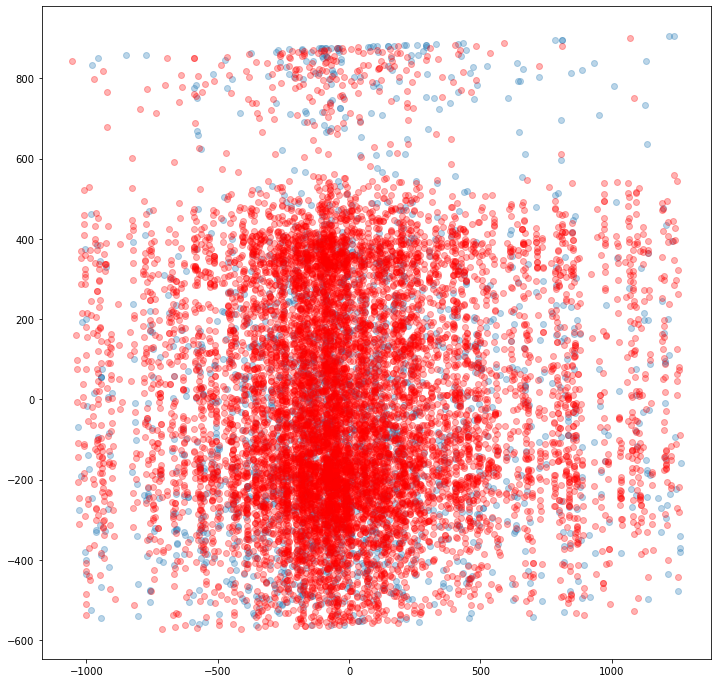

In [8]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12, 12))
plt.scatter(cp[:, 0], cp[:, 1], alpha=0.3, label="crashes")
plt.scatter(ncp[:, 0], ncp[:, 1], alpha=0.3, color='r', label="non-crashes")